In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt        #visualisation
import seaborn as sns                  #Visualisation
%matplotlib inline

In [2]:
dataset = pd.read_csv('train.csv',index_col=0)

In [3]:
dataset.head(10)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
ID,,,,,,,,,
F00000001,188,1,0,1,0,0.0,0,1,0
F00000003,209,1,0,1,0,0.0,0,2,1
F00000004,257,1,0,1,0,0.0,0,2,1
F00000005,257,1,1,1,0,0.0,0,2,1
F00000006,342,1,0,1,0,0.0,0,2,1
F00000008,448,0,1,1,0,NaN,0,2,1
F00000009,448,0,1,1,0,NaN,0,2,1
F00000010,577,1,0,1,0,0.0,0,1,2
F00000012,731,0,0,1,0,0.0,0,2,0


In [4]:
dataset.tail(10)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
ID,,,,,,,,,
F00155919,2999,1,0,2,20,51.0,5,3,0
F00155920,2999,1,0,2,20,52.0,0,3,0
F00155923,2999,1,0,2,10,19.0,16,2,1
F00155925,3164,1,0,2,10,11.0,36,1,0
F00155931,3165,1,0,2,60,44.0,15,2,0
F00155935,3337,1,0,2,10,12.0,44,3,0
F00155938,3516,1,0,2,10,20.0,38,1,0
F00155939,3516,1,0,2,15,40.0,8,2,0
F00155942,3702,1,0,2,10,25.0,18,3,0


In [5]:
dataset.shape

(88858, 9)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88858 entries, F00000001 to F00155945
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  88858 non-null  int64  
 1   Crop_Type                88858 non-null  int64  
 2   Soil_Type                88858 non-null  int64  
 3   Pesticide_Use_Category   88858 non-null  int64  
 4   Number_Doses_Week        88858 non-null  int64  
 5   Number_Weeks_Used        79858 non-null  float64
 6   Number_Weeks_Quit        88858 non-null  int64  
 7   Season                   88858 non-null  int64  
 8   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 6.8+ MB


In [7]:
dataset.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [8]:
crop_damage = dataset['Crop_Damage']
soil_type = dataset['Soil_Type']
correlation  = crop_damage.corr(soil_type)
correlation

-0.021997272041923234

In [9]:
# import warnings
# warnings.filterwarnings("ignore")

# dataset_corr = dataset.drop(['Crop_Damage'],axis=1) 


# crop_damage = dataset.Crop_Damage
# for i in range(dataset.shape[1]):
#     correlation = crop_damage.corr(dataset[dataset_corr.columns[i]])
#     print(dataset_corr.columns[i],">>>>>>>>>>>>>>",correlation)

In [10]:
corr = dataset.corr(method = 'pearson')
corr

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.434925,0.299279,0.002304,0.202888
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.043991,-0.233394,0.002161,-0.016495
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.070051,0.009364,0.002327,-0.021997
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.344131,-0.554169,0.002811,0.175002
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.126426,-0.037131,-0.001401,-0.030874
Number_Weeks_Used,0.434925,-0.043991,-0.070051,0.344131,0.126426,1.000000,-0.449007,0.004417,0.232192
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.449007,1.000000,0.000595,-0.133117
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.004417,0.000595,1.000000,-0.000184
Crop_Damage,0.202888,-0.016495,-0.021997,0.175002,-0.030874,0.232192,-0.133117,-0.000184,1.000000


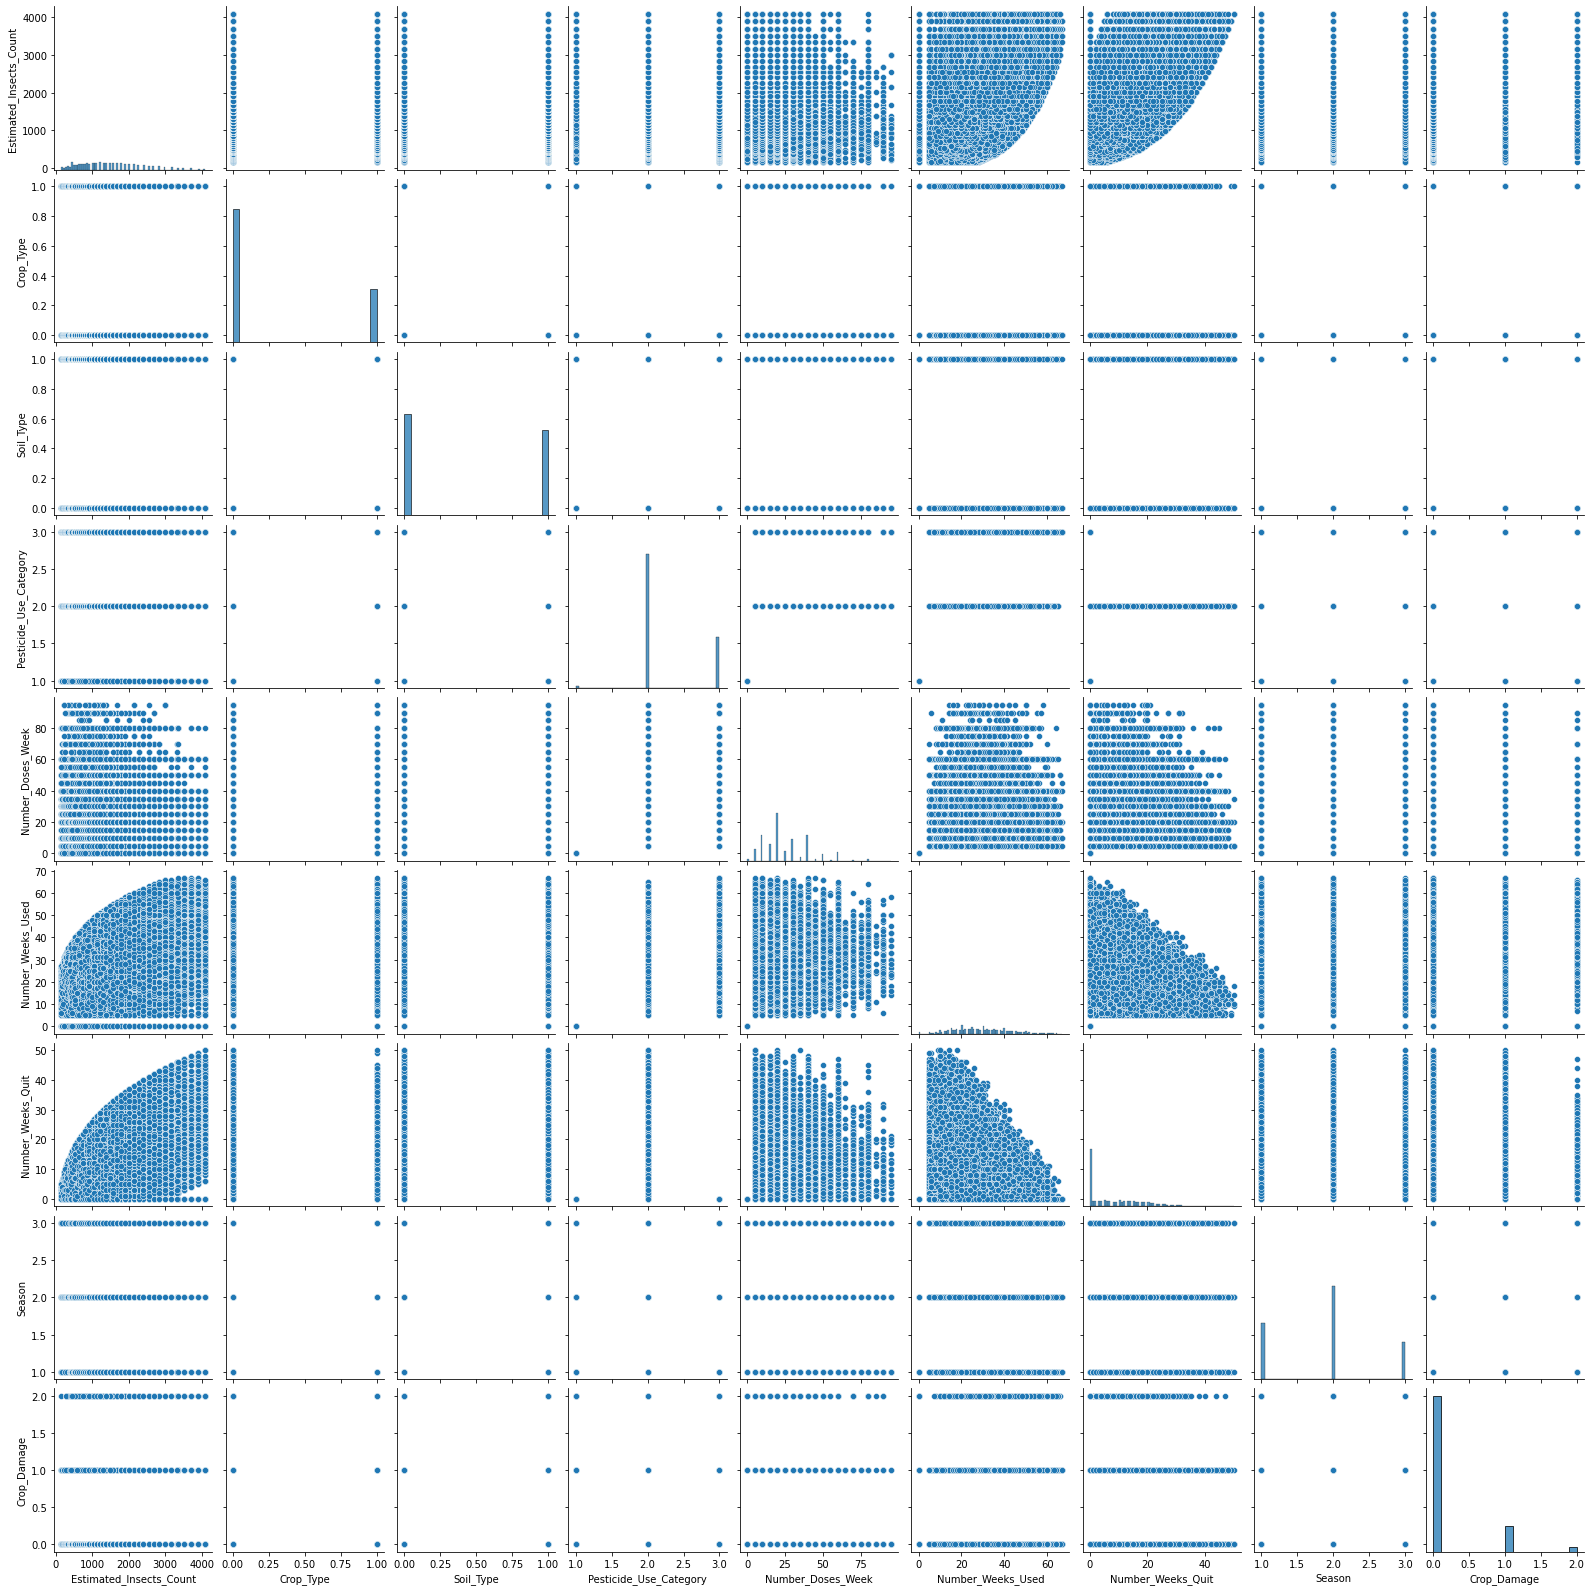

In [11]:
sns.pairplot(dataset)

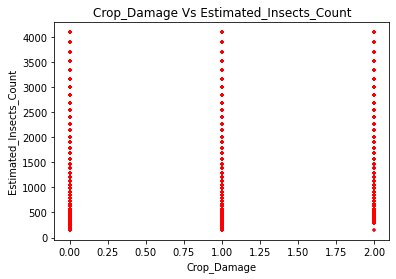

In [12]:
dataset.plot(kind='scatter',
             marker = '+',
             x='Crop_Damage',
             y='Estimated_Insects_Count',
             title = 'Crop_Damage Vs Estimated_Insects_Count',
             c='red')

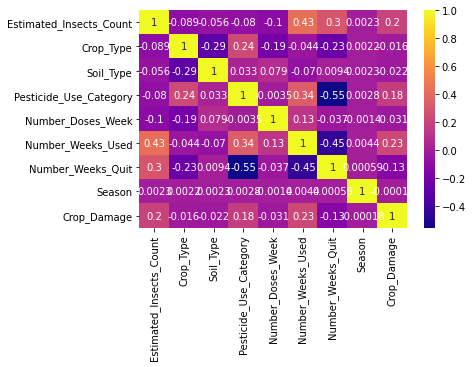

In [13]:
sns.heatmap(dataset.corr(),annot=True,cmap="plasma")

In [14]:
print(dataset.isnull().sum)

<bound method DataFrame.sum of            Estimated_Insects_Count  Crop_Type  ...  Season  Crop_Damage
ID                                             ...                     
F00000001                    False      False  ...   False        False
F00000003                    False      False  ...   False        False
F00000004                    False      False  ...   False        False
F00000005                    False      False  ...   False        False
F00000006                    False      False  ...   False        False
...                            ...        ...  ...     ...          ...
F00155935                    False      False  ...   False        False
F00155938                    False      False  ...   False        False
F00155939                    False      False  ...   False        False
F00155942                    False      False  ...   False        False
F00155945                    False      False  ...   False        False

[88858 rows x 9 columns]>


In [15]:
dataset = dataset.dropna()
dataset.count()

Estimated_Insects_Count    79858
Crop_Type                  79858
Soil_Type                  79858
Pesticide_Use_Category     79858
Number_Doses_Week          79858
Number_Weeks_Used          79858
Number_Weeks_Quit          79858
Season                     79858
Crop_Damage                79858
dtype: int64

In [16]:
dataset.shape

(79858, 9)

In [17]:
dataset.nunique()

Estimated_Insects_Count    71
Crop_Type                   2
Soil_Type                   2
Pesticide_Use_Category      3
Number_Doses_Week          20
Number_Weeks_Used          64
Number_Weeks_Quit          51
Season                      3
Crop_Damage                 3
dtype: int64

In [18]:
l = ['Crop_Type',
'Soil_Type',
'Season',
'Crop_Damage']

for col in l:
    print("***"*40)
    print(col)
    print(dataset[col].value_counts())
    print("***"* 40)
    print("\n")

************************************************************************************************************************
Crop_Type
0    57192
1    22666
Name: Crop_Type, dtype: int64
************************************************************************************************************************


************************************************************************************************************************
Soil_Type
0    43163
1    36695
Name: Soil_Type, dtype: int64
************************************************************************************************************************


************************************************************************************************************************
Season
2    39704
1    24212
3    15942
Name: Season, dtype: int64
************************************************************************************************************************


*****************************************************************************

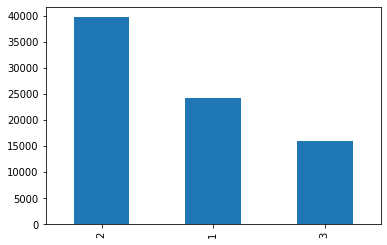

In [19]:
dataset['Season'].value_counts().plot(kind = 'bar')

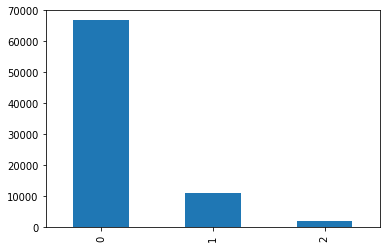

In [20]:
dataset['Crop_Damage'].value_counts().plot(kind='bar')

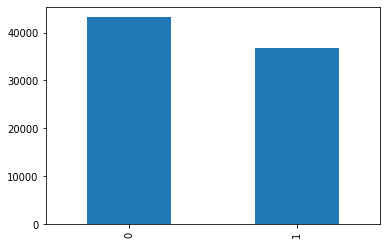

In [21]:
dataset['Soil_Type'].value_counts().plot(kind = 'bar')

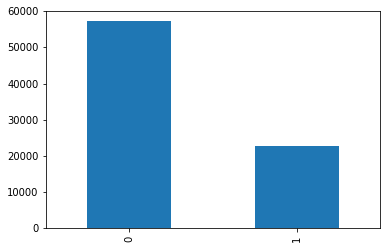

In [22]:
dataset['Crop_Type'].value_counts().plot(kind = 'bar')

In [23]:
dataset.fillna(dataset.mean())

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
ID,,,,,,,,,
F00000001,188,1,0,1,0,0.0,0,1,0
F00000003,209,1,0,1,0,0.0,0,2,1
F00000004,257,1,0,1,0,0.0,0,2,1
F00000005,257,1,1,1,0,0.0,0,2,1
F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
F00155935,3337,1,0,2,10,12.0,44,3,0
F00155938,3516,1,0,2,10,20.0,38,1,0
F00155939,3516,1,0,2,15,40.0,8,2,0


In [24]:
dataset.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,79858.000000,79858.000000,79858.000000,79858.000000,79858.000000,79858.000000,79858.000000,79858.000000,79858.000000
mean,1400.766060,0.283829,0.459503,2.264820,25.848381,28.623970,9.590636,1.896441,0.189975
std,850.268301,0.450858,0.498360,0.461764,15.544704,12.391881,9.902990,0.701498,0.453187
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79858 entries, F00000001 to F00155945
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  79858 non-null  int64  
 1   Crop_Type                79858 non-null  int64  
 2   Soil_Type                79858 non-null  int64  
 3   Pesticide_Use_Category   79858 non-null  int64  
 4   Number_Doses_Week        79858 non-null  int64  
 5   Number_Weeks_Used        79858 non-null  float64
 6   Number_Weeks_Quit        79858 non-null  int64  
 7   Season                   79858 non-null  int64  
 8   Crop_Damage              79858 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 6.1+ MB


In [26]:
dataset_new = dataset.drop(['Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit'],axis=1)

In [27]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79858 entries, F00000001 to F00155945
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Estimated_Insects_Count  79858 non-null  int64
 1   Crop_Type                79858 non-null  int64
 2   Soil_Type                79858 non-null  int64
 3   Pesticide_Use_Category   79858 non-null  int64
 4   Season                   79858 non-null  int64
 5   Crop_Damage              79858 non-null  int64
dtypes: int64(6)
memory usage: 4.3+ MB


In [31]:
from sklearn.cluster import KMeans
x = dataset.iloc[:, [0, 1, 2, 3,4,5]].values
kmeans = KMeans(n_clusters = 3)
y_pred = kmeans.fit_predict(x)

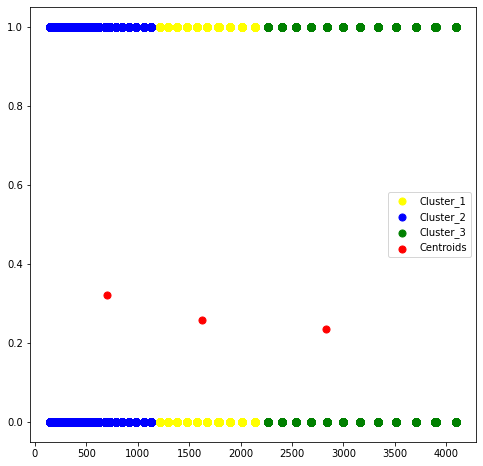

In [32]:
plt.figure(figsize=(8,8))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 50, c = 'yellow', label = 'Cluster_1')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 50, c = 'blue', label = 'Cluster_2')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 50, c = 'green', label = 'Cluster_3')

#Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')

plt.legend()

In [33]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79858 entries, F00000001 to F00155945
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Estimated_Insects_Count  79858 non-null  int64
 1   Crop_Type                79858 non-null  int64
 2   Soil_Type                79858 non-null  int64
 3   Pesticide_Use_Category   79858 non-null  int64
 4   Season                   79858 non-null  int64
 5   Crop_Damage              79858 non-null  int64
dtypes: int64(6)
memory usage: 4.3+ MB


In [34]:
x=dataset_new[['Estimated_Insects_Count','Crop_Type','Soil_Type','Pesticide_Use_Category','Season',]]
y=dataset_new['Crop_Damage']
y = y.astype(int)

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 2)

In [36]:
from sklearn.linear_model import LinearRegression

LR  = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

In [37]:
from sklearn.metrics import mean_squared_error

print("The MSE : ", round(mean_squared_error(y_pred,y_test),2))

The MSE :  0.19


In [38]:
from pickle import dump
file = 'model.h5'
dump(LR,open(file,'wb'))

In [39]:
from pickle import load
x = load(open('model.h5','rb'))


In [40]:
dataset_new.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Season,Crop_Damage
ID,,,,,,
F00000001,188,1,0,1,1,0
F00000003,209,1,0,1,2,1
F00000004,257,1,0,1,2,1
F00000005,257,1,1,1,2,1
F00000006,342,1,0,1,2,1


In [41]:
# Estimated_Insects_Count 'Crop_Type','Soil_Type','Pesticide_Use_Category','Season'

y = x.predict([[289,1,1.0,0.0,1.0]])
y=(y*10).round();
y_value = abs(y)
print(abs(y))
if(y_value == 0):
  print('Not damaged')
elif(y_value == 1):
  print('need to take care')
elif(y_value == 2):
  print('fully damaged')
else:
  print('Plant has good health')

[5.]
Plant has good health
